In [1]:
import pandas as pd
import numpy as np

In [15]:
df = pd.read_excel('riots_inUSA.xlsx')

In [3]:
df

,county,State,number_protests,code_x,Unnamed: 0,code_y,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,...,FamilyWork,Unemployment,Black_binary,Rank,"State,",Per_capita_Income,Median_household_income,Median_family_income,Population,Number of households
0,NaN,Alaska,1,AK,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Idaho,10,ID,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Illinois,32,IL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Missouri,6,MO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Ohio,40,OH,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7488,"[ 62 ], Collier",Florida,7,FL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7489,"[ 63 ], Collier",Florida,6,FL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7490,"[ 71 ], Lee",Florida,2,FL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7491,"[ 72 ], Lee",Florida,1,FL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Vizualization

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_new = df
df_new.rename(columns={'Black': 'Процент',
                           'number_protests': 'Количество',
                           'TotalPop': 'Население'}, inplace=True)

In [14]:
df_new.columns

Index(['county', 'State', 'Количество', 'code_x', 'Unnamed: 0', 'code_y',
       'percentage16_Donald_Trump', 'percentage16_Hillary_Clinton',
       'total_votes16', 'votes16_Donald_Trump', 'votes16_Hillary_Clinton',
       'percentage20_Donald_Trump', 'percentage20_Joe_Biden', 'total_votes20',
       'votes20_Donald_Trump', 'votes20_Joe_Biden', 'lat', 'long', 'cases',
       'deaths', 'Население', 'Men', 'Women', 'Hispanic', 'White', 'Процент',
       'Native', 'Asian', 'Pacific', 'VotingAgeCitizen', 'Income', 'IncomeErr',
       'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'ChildPoverty',
       'Professional', 'Service', 'Office', 'Construction', 'Production',
       'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment', 'Black_binary', 'Rank', 'State,',
       'Per_capita_Income', 'Median_household_income', 'Median_family_income',
       'Population', 'N

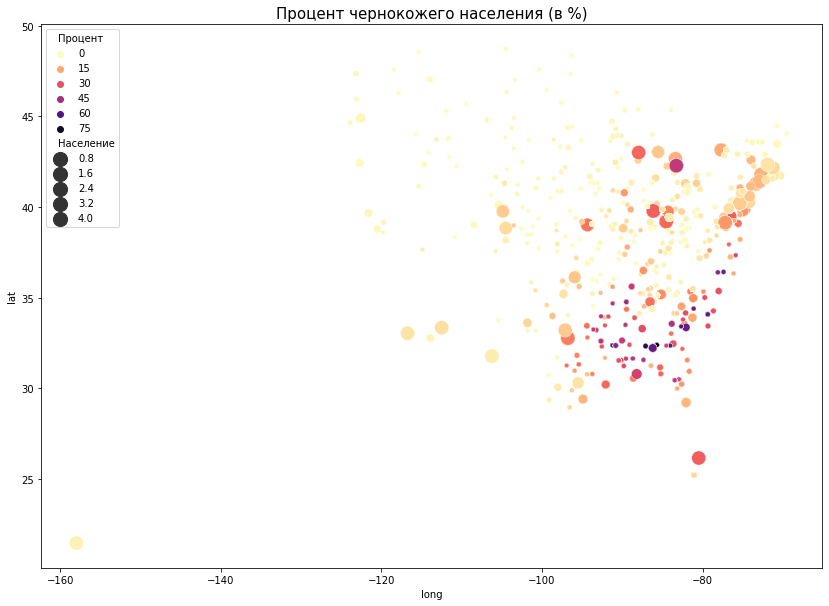

In [6]:
plt.figure(figsize = (14,10))                                                  #size = "total_votes20"
sns.scatterplot(data = df_new, x = "long", y = "lat", hue = "Процент", size = "Население", sizes = (20, 200),
                size_norm = (10000, 800000), palette = "magma_r")
plt.title("Процент чернокожего населения (в %)", fontsize=15)
plt.show()

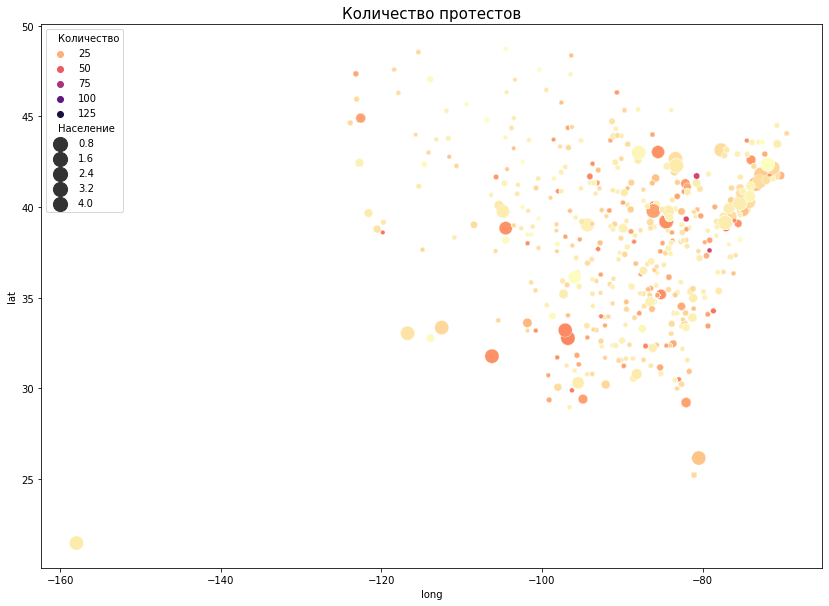

In [7]:
plt.figure(figsize = (14,10))                                                 
sns.scatterplot(data = df_new, x = "long", y = "lat", hue = "Количество", size = "Население", sizes = (20, 200),
                size_norm = (10000, 800000), palette = "magma_r")
plt.title("Количество протестов", fontsize=15)
plt.show()

## OLS Regression

In [9]:
import os
import statsmodels.formula.api as statf 
import statsmodels.api as smo 

In [17]:
df.columns

Index(['county', 'State', 'number_protests', 'code_x', 'Unnamed: 0', 'code_y',
       'percentage16_Donald_Trump', 'percentage16_Hillary_Clinton',
       'total_votes16', 'votes16_Donald_Trump', 'votes16_Hillary_Clinton',
       'percentage20_Donald_Trump', 'percentage20_Joe_Biden', 'total_votes20',
       'votes20_Donald_Trump', 'votes20_Joe_Biden', 'lat', 'long', 'cases',
       'deaths', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'VotingAgeCitizen', 'Income', 'IncomeErr',
       'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'ChildPoverty',
       'Professional', 'Service', 'Office', 'Construction', 'Production',
       'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment', 'Black_binary', 'Rank', 'State,',
       'Per_capita_Income', 'Median_household_income', 'Median_family_income',
       'Population', 

In [18]:
df['Population'] = pd.to_numeric(df['Population'], errors='coerce')
df['votes16_Donald_Trump_perc'] = df['votes16_Donald_Trump'] / df['TotalPop'] 

In [20]:
model1 = smo.OLS.from_formula('number_protests ~ Median_household_income', 
                                                      data = df)
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:        number_protests   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01919
Date:                Tue, 01 Nov 2022   Prob (F-statistic):              0.890
Time:                        23:42:54   Log-Likelihood:                -22234.
No. Observations:                6367   AIC:                         4.447e+04
Df Residuals:                    6365   BIC:                         4.449e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [21]:
model2 = smo.OLS.from_formula('number_protests ~ Median_household_income + Population', 
                                                      data = df)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:        number_protests   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     8.454
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           0.000215
Time:                        23:48:14   Log-Likelihood:                -22117.
No. Observations:                6340   AIC:                         4.424e+04
Df Residuals:                    6337   BIC:                         4.426e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [25]:
model3 = smo.OLS.from_formula('number_protests ~ Median_household_income + Population + Poverty', 
                                                      data = df)
results3 = model3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:        number_protests   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     21.15
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           1.29e-13
Time:                        23:51:14   Log-Likelihood:                -19153.
No. Observations:                5536   AIC:                         3.831e+04
Df Residuals:                    5532   BIC:                         3.834e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [26]:
model4 = smo.OLS.from_formula('number_protests ~ Median_household_income + Population + Poverty + Black', 
                                                      data = df)
results4 = model4.fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:        number_protests   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     23.55
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           2.47e-19
Time:                        23:53:24   Log-Likelihood:                -19137.
No. Observations:                5536   AIC:                         3.828e+04
Df Residuals:                    5531   BIC:                         3.832e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [27]:
model5 = smo.OLS.from_formula('number_protests ~ Median_household_income + Population + Poverty + Black+ Unemployment', 
                                                      data = df)
results5 = model5.fit()
print(results5.summary())

                            OLS Regression Results                            
Dep. Variable:        number_protests   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     22.31
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           3.23e-22
Time:                        23:59:26   Log-Likelihood:                -19129.
No. Observations:                5536   AIC:                         3.827e+04
Df Residuals:                    5530   BIC:                         3.831e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [28]:
model6 = smo.OLS.from_formula('number_protests ~ Median_household_income + Population + Poverty + Black+ Unemployment + cases', 
                                                      data = df)
results6 = model6.fit()
print(results6.summary())

                            OLS Regression Results                            
Dep. Variable:        number_protests   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     21.97
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           1.10e-25
Time:                        00:01:46   Log-Likelihood:                -19119.
No. Observations:                5536   AIC:                         3.825e+04
Df Residuals:                    5529   BIC:                         3.830e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [30]:
model7 = smo.OLS.from_formula('number_protests ~ Median_household_income + Population + Poverty \
                            + Black+ Unemployment + cases  + deaths', 
                                                      data = df)
results7 = model7.fit()
print(results7.summary())

                            OLS Regression Results                            
Dep. Variable:        number_protests   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     23.19
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           3.07e-31
Time:                        00:07:34   Log-Likelihood:                -19104.
No. Observations:                5536   AIC:                         3.822e+04
Df Residuals:                    5528   BIC:                         3.828e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [31]:
model8 = smo.OLS.from_formula('number_protests ~ Median_household_income + Population + Poverty \
                            + Black+ Unemployment + cases  + deaths + Hispanic', 
                                                      data = df)
results8 = model8.fit()
print(results8.summary())

                            OLS Regression Results                            
Dep. Variable:        number_protests   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     20.32
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           1.38e-30
Time:                        00:10:00   Log-Likelihood:                -19104.
No. Observations:                5536   AIC:                         3.823e+04
Df Residuals:                    5527   BIC:                         3.829e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [52]:
model9 = smo.OLS.from_formula('number_protests ~ Median_household_income + Population + Poverty \
                            + Black+ Unemployment + cases  + deaths + Hispanic + + Poverty*Black_binary', 
                                                      data = df)
results9 = model9.fit()
print(results9.summary())

                            OLS Regression Results                            
Dep. Variable:        number_protests   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     16.64
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           4.76e-30
Time:                        01:57:15   Log-Likelihood:                -19102.
No. Observations:                5536   AIC:                         3.823e+04
Df Residuals:                    5525   BIC:                         3.830e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

##  Event Count Regression

In [36]:
import statsmodels as sm

In [37]:
model1 = sm.discrete.discrete_model.Poisson.from_formula('number_protests ~ Median_household_income', 
                                                      data = df)
results1 = model1.fit()
print(results1.summary())

Optimization terminated successfully.
         Current function value: 4.331326
         Iterations 4
                          Poisson Regression Results                          
Dep. Variable:        number_protests   No. Observations:                 6367
Model:                        Poisson   Df Residuals:                     6365
Method:                           MLE   Df Model:                            1
Date:                Wed, 02 Nov 2022   Pseudo R-squ.:               2.121e-06
Time:                        00:56:01   Log-Likelihood:                -27578.
converged:                       True   LL-Null:                       -27578.
Covariance Type:            nonrobust   LLR p-value:                    0.7323
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.3453      0.017    136.875      0.000       2.312   

In [38]:
model2 = sm.discrete.discrete_model.Poisson.from_formula('number_protests ~ Median_household_income + Population', 
                                                      data = df)
results2 = model2.fit()
print(results2.summary())

Optimization terminated successfully.
         Current function value: 4.315894
         Iterations 5
                          Poisson Regression Results                          
Dep. Variable:        number_protests   No. Observations:                 6340
Model:                        Poisson   Df Residuals:                     6337
Method:                           MLE   Df Model:                            2
Date:                Wed, 02 Nov 2022   Pseudo R-squ.:                0.001797
Time:                        00:57:19   Log-Likelihood:                -27363.
converged:                       True   LL-Null:                       -27412.
Covariance Type:            nonrobust   LLR p-value:                 4.011e-22
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.3968      0.018    135.127      0.000       2.362   

In [40]:
model3 = sm.discrete.discrete_model.Poisson.from_formula('number_protests ~ Median_household_income + Population \
+ Poverty', 
                                                      data = df)
results3 = model3.fit()
print(results3.summary())

Optimization terminated successfully.
         Current function value: 4.225090
         Iterations 5
                          Poisson Regression Results                          
Dep. Variable:        number_protests   No. Observations:                 5536
Model:                        Poisson   Df Residuals:                     5532
Method:                           MLE   Df Model:                            3
Date:                Wed, 02 Nov 2022   Pseudo R-squ.:                0.007815
Time:                        00:59:18   Log-Likelihood:                -23390.
converged:                       True   LL-Null:                       -23574.
Covariance Type:            nonrobust   LLR p-value:                 1.479e-79
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.5979      0.023    111.734      0.000       2.552   

In [41]:
model4 = sm.discrete.discrete_model.Poisson.from_formula('number_protests ~ Median_household_income + Population \
+ Poverty + Black', 
                                                      data = df)
results4 = model4.fit()
print(results4.summary())

Optimization terminated successfully.
         Current function value: 4.207950
         Iterations 5
                          Poisson Regression Results                          
Dep. Variable:        number_protests   No. Observations:                 5536
Model:                        Poisson   Df Residuals:                     5531
Method:                           MLE   Df Model:                            4
Date:                Wed, 02 Nov 2022   Pseudo R-squ.:                 0.01184
Time:                        01:02:18   Log-Likelihood:                -23295.
converged:                       True   LL-Null:                       -23574.
Covariance Type:            nonrobust   LLR p-value:                1.666e-119
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.6349      0.023    112.359      0.000       2.589   

In [42]:
model5 = sm.discrete.discrete_model.Poisson.from_formula('number_protests ~ Median_household_income + Population \
+ Poverty + Black + Unemployment', 
                                                      data = df)
results5 = model5.fit()
print(results5.summary())

Optimization terminated successfully.
         Current function value: 4.199072
         Iterations 5
                          Poisson Regression Results                          
Dep. Variable:        number_protests   No. Observations:                 5536
Model:                        Poisson   Df Residuals:                     5530
Method:                           MLE   Df Model:                            5
Date:                Wed, 02 Nov 2022   Pseudo R-squ.:                 0.01393
Time:                        01:03:50   Log-Likelihood:                -23246.
converged:                       True   LL-Null:                       -23574.
Covariance Type:            nonrobust   LLR p-value:                1.206e-139
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.5739      0.024    106.088      0.000       2.526   

In [45]:
model6 = sm.discrete.discrete_model.Poisson.from_formula('number_protests ~ Median_household_income + Population \
+ Poverty + Black + Unemployment + deaths', 
                                                      data = df)
results6 = model6.fit()
print(results6.summary())

Optimization terminated successfully.
         Current function value: 4.199071
         Iterations 8
                          Poisson Regression Results                          
Dep. Variable:        number_protests   No. Observations:                 5536
Model:                        Poisson   Df Residuals:                     5529
Method:                           MLE   Df Model:                            6
Date:                Wed, 02 Nov 2022   Pseudo R-squ.:                 0.01393
Time:                        01:05:25   Log-Likelihood:                -23246.
converged:                       True   LL-Null:                       -23574.
Covariance Type:            nonrobust   LLR p-value:                1.448e-138
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.5740      0.024    105.966      0.000       2.526   

In [46]:
model7 = sm.discrete.discrete_model.Poisson.from_formula('number_protests ~ Median_household_income + Population \
+ Poverty + Black + Unemployment + deaths + Hispanic', 
                                                      data = df)
results7 = model7.fit()
print(results7.summary())

Optimization terminated successfully.
         Current function value: 4.198364
         Iterations 7
                          Poisson Regression Results                          
Dep. Variable:        number_protests   No. Observations:                 5536
Model:                        Poisson   Df Residuals:                     5528
Method:                           MLE   Df Model:                            7
Date:                Wed, 02 Nov 2022   Pseudo R-squ.:                 0.01409
Time:                        01:07:15   Log-Likelihood:                -23242.
converged:                       True   LL-Null:                       -23574.
Covariance Type:            nonrobust   LLR p-value:                3.254e-139
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.5569      0.025    102.050      0.000       2.508   

In [50]:
model8 = sm.discrete.discrete_model.Poisson.from_formula('number_protests ~ Median_household_income + Population \
+ Poverty + Black + Unemployment + deaths + Hispanic + Poverty*Black_binary', 
                                                      data = df)
results8 = model8.fit()
print(results8.summary())

Optimization terminated successfully.
         Current function value: 4.196497
         Iterations 8
                          Poisson Regression Results                          
Dep. Variable:        number_protests   No. Observations:                 5536
Model:                        Poisson   Df Residuals:                     5526
Method:                           MLE   Df Model:                            9
Date:                Wed, 02 Nov 2022   Pseudo R-squ.:                 0.01453
Time:                        01:56:57   Log-Likelihood:                -23232.
converged:                       True   LL-Null:                       -23574.
Covariance Type:            nonrobust   LLR p-value:                1.119e-141
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.5608      0.025    101.917      0.000       2.512   